You’ll rarely need to create your own regular expressions.
Many websites offer repositories of existing regular expressions that you can copy and use:

https://regex101.com

http://www.regexlib.com

https://www.regular-expressions.info

In [3]:
import re
pattern = '02215'
'Match' if re.fullmatch(pattern, '02215') else 'No match'

'Match'

In [4]:
'Match' if re.fullmatch(pattern, '51220') else 'No match'

'No match'

In [1]:
import requests
from bs4 import BeautifulSoup
url = 'http://www.mpe.mpg.de/~jcg/grbgen.html'
r = requests.get(url)
html_contents = r.text
html_soup = BeautifulSoup(html_contents)
dataFound=html_soup.find_all('td')

burstName = []
xRayPosition = []
redshift = []

i=0
burstNumber = 0
while(True):
    bn = dataFound[10+10*i].contents[0].text
    if(len(bn)<6):
        break
    zString = dataFound[19+10*i].contents[0]
    try:
        zFloat = float(zString)
        burstNumber += 1
        burstName.append(bn)
        position = dataFound[11+10*i].text
        xRayPosition.append(position)
        redshift.append(zFloat)
    except:
        pass
    i += 1
print('Number of bursts with a redshift = ',burstNumber)

Number of bursts with a redshift =  467


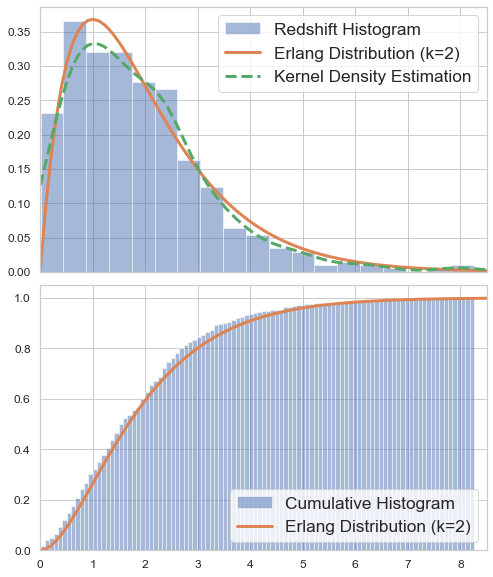

In [201]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
sns.set(style="whitegrid")


fig, axes = plt.subplots(2, 1, figsize=(8, 10),
                         sharex=True, gridspec_kw={'hspace': 0.05})

axes[0].hist(redshift, density=True,
             alpha=0.5, bins=19, label="Redshift Histogram")
x = np.linspace(0.0,10.0,100)
Y = stats.erlang(2).pdf(x)
axes[0].plot(x, Y, linestyle="-", linewidth=3.0,
             #color="navy",
             label="Erlang Distribution (k=2)")
kde = stats.kde.gaussian_kde(redshift)
axes[0].plot(x, kde(x), linestyle="--",
             linewidth=3.0, label="Kernel Density Estimation")
axes[0].set_xlim([0,8.5])
axes[0].tick_params(labelsize=12)
handles, labels = axes[0].get_legend_handles_labels()
axes[0].legend([handles[2],handles[0],handles[1]],
               [labels[2],labels[0],labels[1]],fontsize='x-large')

axes[1].hist(redshift, cumulative=True,
             rwidth=5.0, density=True, alpha=0.5, bins=100,
            label="Cumulative Histogram")
x = np.linspace(0.0,10.0,100)
Y = stats.erlang(2).cdf(x)
axes[1].plot(x, Y, linestyle="-", linewidth=3.0,
             label="Erlang Distribution (k=2)")
axes[1].tick_params(labelsize=12)
handles, labels = axes[1].get_legend_handles_labels()
axes[1].legend([handles[1],handles[0]],
               [labels[1],labels[0]],fontsize='x-large',loc="lower right")